<a href="https://colab.research.google.com/github/sharanv16/ALIENS-vs-Bot/blob/main/Copy_AI_Proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forming the Grid

create a closed square grid

*   0 implies open cell
*   -1 implies closed cell
*   1 implies alien
*   10 implies captain
*   2 implies bot


# IMPORTS

In [2]:
import random
import heapq
import numpy as np
import matplotlib.pyplot as plt

# MAKING THE GRID

In [3]:
#Parameters grid size,number of aliens
class Grid:
  def __init__(self,n,no_of_aliens):
    self.no_of_aliens =no_of_aliens
    self.n = n
    self.grid = np.full((self.n,self.n),-1)
    self.rows, self.cols = self.grid.shape
    # assign a random start point
    self.x_start =  random.randint(0,self.n-1)
    self.y_start =  random.randint(0,self.n-1)
    #print(f" start = {self.x_start} {self.y_start}")
    self.grid[self.x_start,self.y_start] = 0
    #start building paths from the start point

  def find_closed_cells_with_one_open_neighbor(self):
    self.results = []
    for i in range(self.rows):
      for j in range(self.cols):
        if self.grid[i, j] == -1:  # Check for closed cells only
          self.adjacent_cells = [(i - 1, j), (i, j - 1), (i + 1, j), (i, j + 1)]
          self.adjacent_cells = [(x, y) for x, y in self.adjacent_cells if 0 <= x < self.rows and 0 <= y < self.cols]
          self.num_zero_neighbors = sum(self.grid[x, y] == 0 for x, y in self.adjacent_cells)
          if self.num_zero_neighbors == 1:
            self.results.append((i, j))
    return self.results


  def create_grid(self):
    self.closed_cells = []
    self.avl_cells = self.find_closed_cells_with_one_open_neighbor()
    #print(self.avl_cells)
    while self.avl_cells:
      p = random.choice(self.avl_cells)
      self.grid[p] = 0
      self.avl_cells = []
      self.avl_cells = self.find_closed_cells_with_one_open_neighbor()
    for i in range(self.rows):
      for j in range(self.cols):
        if self.grid[i,j] ==-1:
          self.closed_cells.append((i,j))
    self.l = len(self.closed_cells)//2
    while self.l:
      random_cell = random.choice(self.closed_cells)
      self.grid[random_cell]  = 0
      self.closed_cells.remove(random_cell)
      self.l-=1



  def find_open_cells(self):
    self.open_cells = []
    for i in range(self.rows):
      for j in range(self.cols):
        if self.grid[i,j] == 0:
          self.open_cells.append((i,j))

  def place_aliens(self):
    k = self.no_of_aliens
    self.find_open_cells()
    self.alien_cells=[]
    while k:
      r = random.choice(self.open_cells)
      self.grid[r] = 1
      self.alien_cells.append(r)
      self.open_cells.remove(r)
      k -=1


  def place_bot(self):
    r =  random.choice(self.open_cells)
    self.grid[r] = 2
    self.start = r

  def place_captain(self):
    r = random.choice(self.open_cells)
    self.grid[r] = 10
    self.goal = r

  def place_players(self):
    self.place_aliens()
    self.place_captain()
    self.place_bot()


  def show_grid(self):
    print(self.grid)



# VISUALIZING THE GRID

In [4]:
def show_color_grid(grid):

  color_map = {
    0: "white",
    -1: "black",
    1: "green",
    10: "red",
    2: "blue",
  }

# Create the figure and axes
  fig, ax = plt.subplots()

# Define cell width and height
  cell_width = 1
  cell_height = 1

# Fill the cells with the "x" pattern
  for i in range(len(grid)):
    for j in range(len(grid[i])):
      color = color_map[grid[i][j]]
      x = j * cell_width
      y = i * cell_height
      ax.plot([x, x + cell_width, x + cell_width, x],
                [y, y + cell_height, y, y + cell_height],
                color=color, linewidth=2)

# Draw black borders around each cell
  for i in range(len(grid)):
    for j in range(len(grid[i])):
      ax.plot([j, j + 1], [i, i], color="black", linewidth=1)
      ax.plot([j, j + 1], [i + 1, i + 1], color="black", linewidth=1)
      ax.plot([j, j], [i, i + 1], color="black", linewidth=1)
      ax.plot([j + 1, j + 1], [i, i + 1], color="black", linewidth=1)

# Set limits and labels
  ax.set_xlim(0, len(grid[0]) * cell_width)
  ax.set_ylim(0, len(grid) * cell_height)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_xlabel("X")
  ax.set_ylabel("Y")

# Turn off axes
  ax.axis('off')

# Show the plot
  plt.show()

# BOT 1


In [8]:
class Bot1:
    def __init__(self, grid, start, goal, alien_cells):
        self.grid = grid.copy()  # Create a copy of the grid
        self.goal = (goal[0],goal[1])
        self.start = (start[0],start[1])
        self.alien_cells = alien_cells
        self.rows, self.cols = self.grid.shape
        self.total_wait = 0
        self.status = "FAIL"
        self.bot_path = [self.start]


    def print_grid(self):
        print(self.grid)  # Print the original grid

    def find_shortest_path(self, grid):
      queue = []
      queue.append((self.start, [self.start]))  # (cell, path)
      visited = set()

      while queue:
        print(len(visited))
        cell, path = queue.pop(0)
        visited.add(cell)

        if cell == self.goal:
            return path

        for neighbor in [(cell[0] + 1, cell[1]), (cell[0] - 1, cell[1]),
                       (cell[0], cell[1] + 1), (cell[0], cell[1] - 1)]:
            if 0 <= neighbor[0] < self.rows and 0 <= neighbor[1] < self.cols and \
               grid[neighbor] != -1 and neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))

      return None

    def get_adjacent_cells(self, x, y):
        adjacent_cells = []
        if 0 <= x - 1 < self.grid.shape[0]:
            adjacent_cells.append((x - 1, y))  # Top
        if 0 <= y - 1 < self.grid.shape[1]:
            adjacent_cells.append((x, y - 1))  # Left
        if 0 <= x + 1 < self.grid.shape[0]:
            adjacent_cells.append((x + 1, y))  # Bottom
        if 0 <= y + 1 < self.grid.shape[1]:
            adjacent_cells.append((x, y + 1))  # Right
        return adjacent_cells

    def start_rescue(self):
        local_grid = self.grid.copy()  # Create a local copy for pathfinding and movements

        self.path = self.find_shortest_path(local_grid)  # Use local_grid for pathfinding
        prev_cell = [self.start]
        flag = 0
        random_cell_choice = None
        if self.path is not None:
          while flag == 0:

              for cell in self.path:
                self.total_wait+=1
                if self.total_wait > 1000:
                  flag = 2
                  break
                print("\n \n")
                #print(local_grid)  # Print the local grid
                local_grid[cell] = 2  # Update local_grid, not the original
                local_grid[prev_cell] = 0
                prev_cell = cell
                self.bot_path.append(cell)

                if cell == self.goal:
                    flag = 1
                    break

                chosen_alien = random.choice(self.alien_cells)
                alien_possible_moves = self.get_adjacent_cells(chosen_alien[0], chosen_alien[1])
                for cell in alien_possible_moves:
                  if cell == 1:
                    alien_possible_moves =alien_possible_moves.remove(cell)
                random_cell_choice = random.choice(alien_possible_moves)
                print(f"Alien moves from {chosen_alien} to {random_cell_choice}")

                if local_grid[random_cell_choice] == 2:
                     flag = 3
                     break
                else:
                    local_grid[random_cell_choice] = 1
                    local_grid[chosen_alien] = 0
                    self.alien_cells.remove(chosen_alien)
                    self.alien_cells.append(random_cell_choice)
        else:
          print("No path found")
        if flag == 1:
            print("GOAL REACHED")
            self.status = "SUCCESS"
        elif flag ==2:
          print("BOT IS STUCK")
          self.status = "STUCK"
        else:
            print("GOAL FAILED")
            print(f"Alien met bot at {random_cell_choice}")
        print(self.bot_path)
        print(f"no of steps taken = {len(self.bot_path)}")
        print(f"total iterations = {self.total_wait}")


# BOT 2

In [5]:
class Bot2:
    def __init__(self, grid, start, goal, alien_cells):
        self.grid = grid.copy()  # Create a copy of the grid
        self.goal = goal
        self.start = start
        self.alien_cells = alien_cells
        self.rows, self.cols = self.grid.shape
        self.curr_pos = start
        self.status = "FAIL"

    def print_grid(self):
        print(self.grid)

    def find_shortest_path(self, grid):
      queue = []
      queue.append((self.curr_pos, [self.curr_pos]))  # (cell, path)
      visited = set()

      while queue:
        #print(len(visited))
        cell, path = queue.pop(0)
        visited.add(cell)

        if cell == self.goal:
          print(f"path is {path}")
          return path

        for neighbor in [(cell[0] + 1, cell[1]), (cell[0] - 1, cell[1]),
                       (cell[0], cell[1] + 1), (cell[0], cell[1] - 1)]:
            if 0 <= neighbor[0] < self.rows and 0 <= neighbor[1] < self.cols and \
               grid[neighbor] != -1 and grid[neighbor] !=1 and neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))

      return None

    def get_adjacent_cells(self, x, y):
        adjacent_cells = []
        if 0 <= x - 1 < self.grid.shape[0]:
            adjacent_cells.append((x - 1, y))  # Top
        if 0 <= y - 1 < self.grid.shape[1]:
            adjacent_cells.append((x, y - 1))  # Left
        if 0 <= x + 1 < self.grid.shape[0]:
            adjacent_cells.append((x + 1, y))  # Bottom
        if 0 <= y + 1 < self.grid.shape[1]:
            adjacent_cells.append((x, y + 1))  # Right
        return adjacent_cells

    def start_rescue(self):
        local_grid = self.grid.copy()  # Create a local copy for pathfinding and movements
        self.path = self.find_shortest_path(local_grid)  # Use local_grid for pathfinding
        self.curr_pos = self.start
        prev_cell = self.curr_pos
        flag = 0
        self.bot_path = [self.curr_pos]
        self.total_wait = 0
        self.j = 1

        while flag == 0 :
          self.total_wait += 1
          if self.total_wait >1000:
            flag = 2
            break
          if self.path is None:
            self.path = self.find_shortest_path(local_grid)
          if self.path is not None:
            if self.alien_cells in self.path:
              self.path = self.find_shortest_path(local_grid)
              self.j = 1
          if self.path is None: # if the path is None once when does it get updated ?
              print("idle")
              continue
          else:
            try :
              self.j +=1
              local_grid[self.curr_pos] = 0
              self.curr_pos = self.path[self.j]
              local_grid[self.curr_pos] = 2
              self.bot_path.append(self.curr_pos)
              if self.curr_pos == self.goal:
                flag = 1
                break
            except:
              pass
          chosen_alien = random.choice(self.alien_cells)
          alien_possible_moves = self.get_adjacent_cells(chosen_alien[0], chosen_alien[1])
          for cell in alien_possible_moves:
              if cell == 1:
                alien_possible_moves =alien_possible_moves.remove(cell)
          random_cell_choice = random.choice(alien_possible_moves)
          print(f"Alien moves from {chosen_alien} to {random_cell_choice}")

          if local_grid[random_cell_choice] == 2:
             flag = 3
             break
          else:
            local_grid[random_cell_choice] = 1
            local_grid[chosen_alien] = 0
            self.alien_cells.remove(chosen_alien)
            self.alien_cells.append(random_cell_choice)

        if flag == 1:
            print("GOAL REACHED")
            self.status = "SUCCESS"
        elif flag == 2:
          print(local_grid)
          print("Bot is stuck")
          self.status = "STUCK"
        elif flag == 3 :
            print("GOAL FAILED")
            print(f"Alien met bot at {random_cell_choice}")
        else:
          print("Unknown")
        print(self.bot_path)
        print(f"no.of steps taken = {len(self.bot_path)} \n total iterations = {self.total_wait}")



# BOT 3

In [43]:
class Bot3:
    def __init__(self, grid, start, goal, alien_cells):
        self.grid = grid.copy()  # Create a copy of the grid
        self.goal = goal
        self.start = start
        self.alien_cells = alien_cells
        self.rows, self.cols = self.grid.shape
        self.curr_pos = start
        self.status = "FAIL"

    def print_grid(self):
        print(self.grid)

    def transform_grid(self,grid):
      for alien in self.alien_cells:
        adj_cells = self.get_adjacent_cells(alien[0],alien[1])
        for cell in adj_cells:
          if grid[cell] == 0 :
            grid[cell] = 1
      return grid


    def find_shortest_path(self, grid):
      queue = []
      queue.append((self.curr_pos, [self.curr_pos]))  # (cell, path)
      visited = set()

      while queue:
        #print(len(visited))
        cell, path = queue.pop(0)
        visited.add(cell)

        if cell == self.goal:
          print(f"path is {path}")
          return path

        for neighbor in [(cell[0] + 1, cell[1]), (cell[0] - 1, cell[1]),
                       (cell[0], cell[1] + 1), (cell[0], cell[1] - 1)]:
            if 0 <= neighbor[0] < self.rows and 0 <= neighbor[1] < self.cols and \
               grid[neighbor] != -1 and grid[neighbor] !=1 and neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))

      return None

    def get_adjacent_cells(self, x, y):
        adjacent_cells = []
        if 0 <= x - 1 < self.grid.shape[0]:
            adjacent_cells.append((x - 1, y))  # Top
        if 0 <= y - 1 < self.grid.shape[1]:
            adjacent_cells.append((x, y - 1))  # Left
        if 0 <= x + 1 < self.grid.shape[0]:
            adjacent_cells.append((x + 1, y))  # Bottom
        if 0 <= y + 1 < self.grid.shape[1]:
            adjacent_cells.append((x, y + 1))  # Right
        return adjacent_cells

    def start_rescue(self):
        local_grid = self.grid.copy()  # Create a local copy for pathfinding and movements
        self.path = self.find_shortest_path(self.transform_grid(local_grid.copy()))
        if self.path is None:
          self.path = self.find_shortest_path(local_grid)
        self.curr_pos = self.start
        prev_cell = self.curr_pos
        flag = 0
        self.bot_path = [self.curr_pos]
        self.total_wait = 0
        self.j = 1

        while flag == 0 :
          self.total_wait += 1
          if self.total_wait >1000:
            flag = 2
            break
          if self.path is None or self.alien_cells in self.path:
              self.path = self.find_shortest_path(self.transform_grid(local_grid.copy()))
              if self.path is None:
                self.path = self.find_shortest_path(local_grid)
                if self.path is None :
                  print("idle")
          if self.path is not None:
                print(self.path)
                try :
                  self.j +=1
                  local_grid[self.curr_pos] = 0
                  self.curr_pos = self.path[self.j]
                  local_grid[self.curr_pos] = 2
                  self.bot_path.append(self.curr_pos)
                  if self.curr_pos == self.goal:
                    flag = 1
                    break
                except:
                  pass
          chosen_alien = random.choice(self.alien_cells)
          alien_possible_moves = self.get_adjacent_cells(chosen_alien[0], chosen_alien[1])
          for cell in alien_possible_moves:
              if cell == 1:
                alien_possible_moves =alien_possible_moves.remove(cell)
          random_cell_choice = random.choice(alien_possible_moves)
          print(f"Alien moves from {chosen_alien} to {random_cell_choice}")

          if local_grid[random_cell_choice] == 2:
             flag = 3
             break
          else:
            local_grid[random_cell_choice] = 1
            local_grid[chosen_alien] = 0
            self.alien_cells.remove(chosen_alien)
            self.alien_cells.append(random_cell_choice)

        if flag == 1:
            print("GOAL REACHED")
            self.status = "SUCCESS"
        elif flag == 2:
          print(local_grid)
          print("Bot is stuck")
          #show_color_grid(local_grid)
        elif flag == 3 :
            print("GOAL FAILED")
            print(f"Alien met bot at {random_cell_choice}")
        else:
          print("Unknown")
        print(self.bot_path)
        print(f"no.of steps taken = {len(self.bot_path)} \n total iterations = {self.total_wait}")



# MAIN

In [39]:
g = Grid(5,2)
g.create_grid()
g.place_players()
#g.show_grid()
#print(f" start = {g.start} \n goal = {g.goal}")

In [40]:
g.show_grid()
g.start

[[ 0  0  0  0  0]
 [ 0  0  0  0  0]
 [ 0 -1  0 -1  0]
 [ 0 -1  2 -1 10]
 [ 0  0  1  0  1]]


(3, 2)

In [26]:
show_color_grid(g.grid)
#g.start
# grid is represented as

# 4,0 4,1......
# 3,0 3,1......
# 2,0 2,1......
# 1,0 1,1......
# 0,0 1,1......


NameError: name 'show_color_grid' is not defined

In [27]:
b1 = Bot1(g.grid.copy(),g.start,g.goal,g.alien_cells)
print(b1.find_shortest_path(g.grid.copy()))


0
1
2
3
4
5
6
6
7
8
8
9
10
10
10
11
12
12
13
14
14
14
14
15
16
17
17
17
18
19
19
[(2, 0), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4)]


In [28]:
print(b1.bot_path)

[(2, 0)]


In [28]:
print(f"distance = {np.sqrt((g.start[0] - g.goal[0])**2 + (g.start[1]-g.goal[1])**2)}")

distance = 2.0


start = (4, 8) goal = (7, 0)


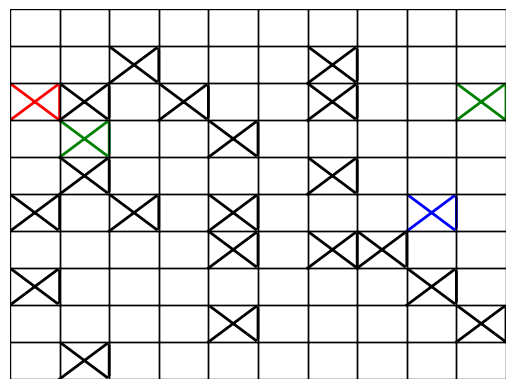

In [103]:
b2 = Bot2(g.grid.copy(),g.start,g.goal,g.alien_cells)
print(f"start = {g.start} goal = {g.goal}")
show_color_grid(g.grid)

In [104]:
b2.start_rescue()

path is [(4, 8), (5, 8), (6, 8), (7, 8), (8, 8), (9, 8), (9, 7), (9, 6), (9, 5), (9, 4), (9, 3), (9, 2), (9, 1), (8, 1), (8, 0), (7, 0)]
Alien moves from (7, 0) to (6, 0)
Alien moves from (6, 0) to (6, 1)
Alien moves from (6, 1) to (7, 1)
Alien moves from (7, 1) to (7, 2)
Alien moves from (9, 5) to (9, 4)
Alien moves from (9, 4) to (9, 5)
Alien moves from (9, 5) to (9, 4)
Alien moves from (7, 2) to (7, 1)
Alien moves from (9, 4) to (8, 4)
Alien moves from (7, 1) to (8, 1)
Alien moves from (8, 4) to (8, 5)
Alien moves from (8, 1) to (8, 0)
Alien moves from (8, 5) to (9, 5)
GOAL REACHED
[(4, 8), (6, 8), (7, 8), (8, 8), (9, 8), (9, 7), (9, 6), (9, 5), (9, 4), (9, 3), (9, 2), (9, 1), (8, 1), (8, 0), (7, 0)]
no.of steps taken = 15 
 total iterations = 14


In [105]:
print(b2.curr_pos)
print(b2.goal)

(7, 0)
(7, 0)


In [44]:
b3 = Bot3(g.grid.copy(),g.start,g.goal,g.alien_cells)
print(f"start = {g.start} goal = {g.goal}")
#show_color_grid(g.grid)

start = (3, 2) goal = (3, 4)


In [45]:
b3.start_rescue()

path is [(3, 2), (2, 2), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4)]
[(3, 2), (2, 2), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4)]
Alien moves from (3, 1) to (2, 1)
[(3, 2), (2, 2), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4)]
Alien moves from (3, 1) to (2, 1)
[(3, 2), (2, 2), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4)]
Alien moves from (2, 1) to (1, 1)
[(3, 2), (2, 2), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4)]
Alien moves from (2, 1) to (1, 1)
[(3, 2), (2, 2), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4)]
GOAL REACHED
[(3, 2), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4)]
no.of steps taken = 6 
 total iterations = 5


In [101]:
print(b2.curr_pos)
print(b2.goal)
print(b2.start)

(0, 3)
(4, 3)
(0, 3)


# CSV

In [51]:
import csv

# Create a list of column headings
column_headings = ["BOT NAME", "GRID SIZE", "NUMBER OF ALIENS", "LENGTH", "STATUS", "LENGTH OF PATH", "ITERATIONS"]

# Open a new CSV file in write mode
with open("alien_battle_simulation.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)

    # Write the column headings to the first row
    writer.writerow(column_headings)
    for i in range (0,20):
      g = Grid(5,7)
      g.create_grid()
      g.place_players()
      g.start

      b1 = Bot1(g.grid.copy(),g.start,g.goal,g.alien_cells)
      b1.start_rescue()

      bot_name = "BOT 1"
      grid_size = g.grid.shape
      number_of_aliens = len(b1.alien_cells)
      length = np.sqrt((g.start[0] - g.goal[0])**2 + (g.start[1]-g.goal[1])**2)
      status = b1.status
      if b1.path is None:
        length_of_path = 0
      else:
        length_of_path = len(b1.path)
      iterations = b1.total_wait

      writer.writerow([
          bot_name,
          grid_size,
          number_of_aliens,
          length,
          status,
          length_of_path,
          iterations
      ])

      b2 = Bot2(g.grid.copy(),g.start,g.goal,g.alien_cells)
      b2.start_rescue()

      bot_name = "BOT 2"
      grid_size = g.grid.shape
      number_of_aliens = len(b2.alien_cells)
      length = np.sqrt((g.start[0] - g.goal[0])**2 + (g.start[1]-g.goal[1])**2)
      status = b2.status
      if b2.path is None:
        length_of_path = 1
      else:
        length_of_path = len(b2.path)
      iterations = b2.total_wait

      writer.writerow([
          bot_name,
          grid_size,
          number_of_aliens,
          length,
          status,
          length_of_path,
          iterations
      ])


      b3 = Bot3(g.grid.copy(),g.start,g.goal,g.alien_cells)
      b3.start_rescue()

      bot_name = "BOT 3"
      grid_size = 300
      number_of_aliens = len(b3.alien_cells)
      length = np.sqrt((g.start[0] - g.goal[0])**2 + (g.start[1]-g.goal[1])**2)
      if b3.total_wait >1000 :
        status = "STUCK"
      else:
        status = b3.status
      if b3.path is None:
        length_of_path = 1
      else:
        length_of_path = len(b3.path)
      iterations = b3.total_wait

      writer.writerow([
          bot_name,
          grid_size,
          number_of_aliens,
          length,
          status,
          length_of_path,
          iterations
      ])

    #You can add more rows by writing additional lists to the CSV writer

print("CSV file created successfully!")


Streaming output truncated to the last 5000 lines.
Alien moves from (2, 2) to (3, 2)
[(1, 2), (1, 3)]
Alien moves from (3, 2) to (3, 3)
[(1, 2), (1, 3)]
Alien moves from (2, 1) to (2, 0)
[(1, 2), (1, 3)]
Alien moves from (2, 4) to (2, 3)
[(1, 2), (1, 3)]
Alien moves from (3, 3) to (3, 2)
[(1, 2), (1, 3)]
Alien moves from (1, 4) to (0, 4)
[(1, 2), (1, 3)]
Alien moves from (3, 2) to (2, 2)
[(1, 2), (1, 3)]
Alien moves from (2, 3) to (1, 3)
[(1, 2), (1, 3)]
Alien moves from (1, 3) to (1, 2)
[(1, 2), (1, 3)]
Alien moves from (2, 2) to (2, 1)
[(1, 2), (1, 3)]
Alien moves from (3, 2) to (3, 1)
[(1, 2), (1, 3)]
Alien moves from (2, 2) to (2, 3)
[(1, 2), (1, 3)]
Alien moves from (3, 1) to (2, 1)
[(1, 2), (1, 3)]
Alien moves from (2, 0) to (2, 1)
[(1, 2), (1, 3)]
Alien moves from (3, 2) to (3, 3)
[(1, 2), (1, 3)]
Alien moves from (2, 1) to (1, 1)
[(1, 2), (1, 3)]
Alien moves from (2, 3) to (3, 3)
[(1, 2), (1, 3)]
Alien moves from (0, 4) to (1, 4)
[(1, 2), (1, 3)]
Alien moves from (3, 3) to (4, 

In [111]:
print(b1.start)
print(b1.goal)
b1.print_grid()

(0, 4)
(0, 0)
[[10 -1  0  0  2]
 [-1  1  1 -1  0]
 [ 0  0  0  1  0]
 [ 0  0  1  0 -1]
 [ 0 -1  1  0  0]]


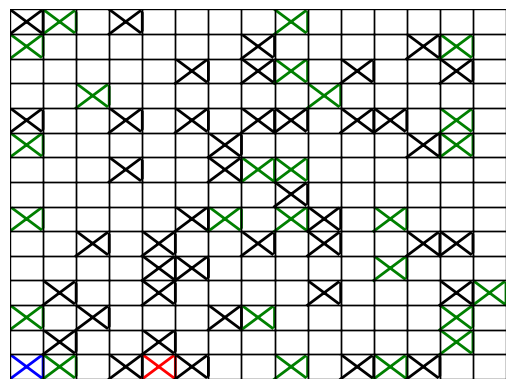

In [ ]:
show_color_grid(b1.grid)

In [ ]:
b1.bot_path

[(14, 2)]